# Pyplot教程
> 本文将向你介绍pyplot接口
## pyplot介绍
`matplotlib.pyplot`是一个让Matplotlib像MATLAB一样工作的函数集合。每个`pyplot`函数都会对图像产生一定改变，比如说创建一个图像，在图像中创建一个绘图区，在绘图区中绘制一些线条，用标签装饰线条……等等。

在`matplotlib.pyplot`中，在调用函数之后许多状态都会保留下来，这样就可以让我们一直保持对当前图像函数和绘图区等内容的选中状态。绘图函数将会直接在当前的axes上工作（请注意这里的axes指的是图像中的一个绘图区，而不是单纯指的是数学上axis(坐标轴)的复数形式）。

> **注意**
>
> puplot API与一般的面向对象的API相比没有那么灵活。你在此见到的大部分函数调用也能使用`Axes`的方法来调用。我们推荐你通览这个教程和其中的例子来了解它是怎样使用的。

使用pyplot创建一个可视化区域是非常快捷的：

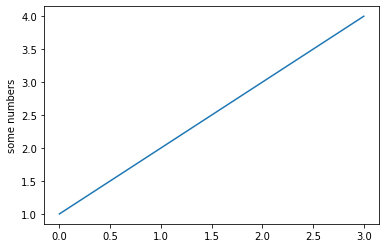

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

你可能会好奇为什么x轴的范围是0-3而y轴的范围是0-4,。如果你向`plot`函数仅仅提供一个列表或数列，matplotlib会假定这是一个代表y值的序列，并为你自动生成一组x轴的序号。由于python的序号是从0开始计数的，得到的默认x向量其实和y有相同的长度，但是是从0开始的，因此x为\[0, 1, 2, 3\]。

`plot`的用法有很多种，根据你想要达成的效果，它所需的参数量也不同。举个例子，如果你想绘制一个x-y线图，你可以这样：

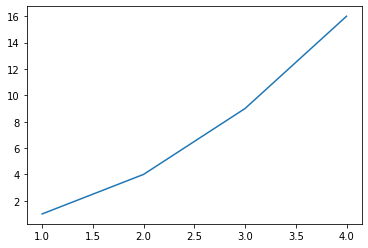

In [2]:
plt.plot([1, 2, 3, 4], [1,4, 9, 16])

## 调整你的绘图格式
对于每一对x,y参数，还有第三个可选的参数——格式字符串。它可以用来设置绘制图像的颜色和线的类型。格式字符串中的字母和符号的意义都源自于MATLAB。你可以将一个代表颜色的字符和一个代表线的类型的字符组合起来作为一个格式字符串使用。默认的格式字符串是'b-'，代表的是蓝色的线。在下面的例子中，为了将上述的线变为红色的圈，你的代码可以这样写：

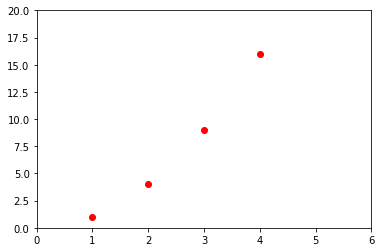

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

在[plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)文档中你可以查看完整的线的类型和格式字符串的列表。上面代码中的`axis`函数需要一个\[xmin, xmax, ymin, ymax\]列表作为输入参数，这个列表指定了坐标轴的范围。

如果matplotlib只能使用列表作为输入，那么在数据处理上的用处会大打折扣。在更多情况下，我们会使用numpy数组作为它的输入。实际上，在matplotlib中，所有序列都是先在内部转换为numpy数组才进一步使用的。在下面的例子中，我们通过使用numpy数组，在一次函数调用中绘制了不同风格的线：

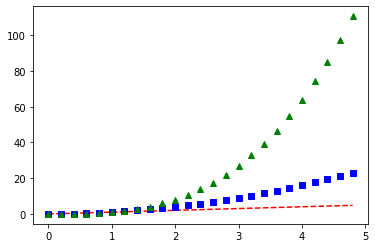

In [4]:
import numpy as np

# 在[0, 5)之间每隔0.2取一个数
t = np.arange(0., 5., 0.2)

# 红色虚线(r--)，蓝色方格(bs)和绿色三角(g^)
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## 绘制带关键字的数据
某些类型的数据可以通过关键字来获取特定的变量，比如`numpy.recarray`或者`pandas.DataFrame`.
在matplotlib中，你可以通过将这类数据对象赋值给`data`参数。如果提供了这一参数，那么你可以通过提供数据的变量名来绘制对应的变量。

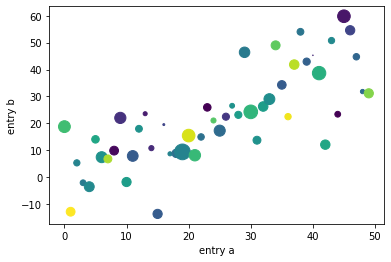

In [5]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}

data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

## 绘制分类变量
你也可以使用分类变量来绘图。matplotlib可以允许我们直接向某些绘图函数中传入分类变量，例如：

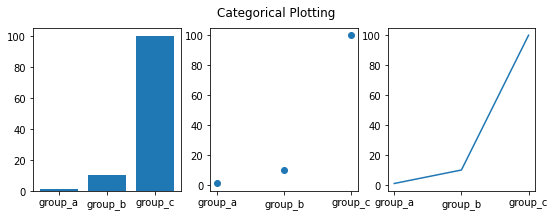

In [6]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.bar(names, values)
plt.subplot(1, 3, 2)
plt.scatter(names, values)
plt.subplot(1, 3, 3)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## 更改线的属性
你可以设置许多与线相关的属性：线粗、点类型、抗锯齿……等等，详见[matplotlib.lines.Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)。设置线的属性的方法有许多种：

- 使用关键字参数

In [7]:
x = [1,2]
y = [1,2]

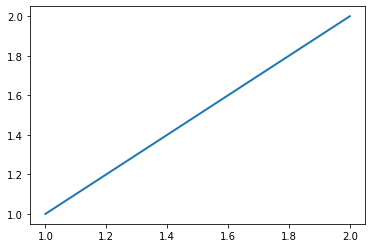

In [8]:
plt.plot(x, y, linewidth=2.0)

- 使用`Line2D`对象的方法来进行设置：`plot`会返回一个由`Line2D`对象组成的列表，例如`line1, line2 = plot(x1, y1, x2, y2)`。在下面的代码中，假设我们只画一条线，则`plot`函数返回的列表长度为1。我们使用元组拆包代码`line,`来得到列表中的第一个元素：

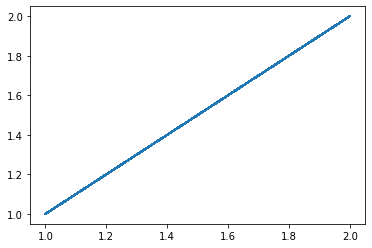

In [9]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # 关闭抗锯齿

- 使用`setp`。下面的例子使用了MATLAB风格的函数来在一行代码中设置多个属性。`setp`可以直接接收单个对象或多个对象组成的列表作为输入。你可以使用python风格的关键字参数，或是MATLAB风格的字符/值的组合。

[None, None, None, None]

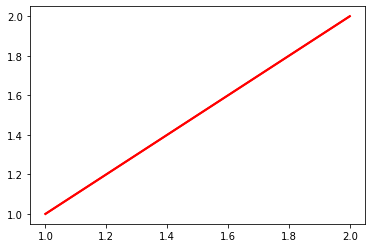

In [10]:
lines = plt.plot(x, y, x, y)
# 使用关键字参数
plt.setp(lines, color='r', linewidth=2.0)
# 或者MATLAB风格的字符/值的组合
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

下面是可用的[Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)属性列表

| 属性                   | 备注  | 属性值                                            |
|:------------------------|:---|:---------------------------------------------------|
| alpha                  | 透明度 | float                                             |
| animated               |   | [True \| False]                                   |
| antialiased or aa      | 抗锯齿 | [True \| False]                                   |
| clip_box               |   | a matplotlib.transform.Bbox instance              |
| clip_on                |   | [True \| False]                                   |
| clip_path              |   | a Path instance and a Transform instance, a Patch |
| color or c             | 线颜色 | any matplotlib color                              |
| contains               |   | the hit testing function                          |
| dash_capstyle          |   | ['butt' \| 'round' \| 'projecting']               |
| dash_joinstyle         |   | ['miter' \| 'round' \| 'bevel']                   |
| dashes                 | 虚线 | sequence of on/off ink in points                  |
| data                   | 数据 | (np.array xdata, np.array ydata)                  |
| figure                 | 指定图像 | a matplotlib.figure.Figure instance               |
| label                  | 线对象的引用标签 | any string                                        |
| linestyle or ls        | 线类型 | [ '-' \| '--' \| '-.' \| ':' \| 'steps' \| ...]   |
| linewidth or lw        | 线宽  | float value in points                             |
| marker                 | 记号类型 | [ '+' \| ',' \| '.' \| '1' \| '2' \| '3' \| '4' ] |
| markeredgecolor or mec | 记号描边的颜色 | any matplotlib color                              |
| markeredgewidth or mew | 记号描边宽度 | float value in points                             |
| markerfacecolor or mfc | 记号填充颜色 | any matplotlib color                              |
| markersize or ms       | 记号大小 | float                                             |
| markevery              |   | [ None \| integer \| (startind, stride) ]         |
| picker                 |   | used in interactive line selection                |
| pickradius             |   | the line pick selection radius                    |
| solid_capstyle         |   | ['butt' \| 'round' \| 'projecting']               |
| solid_joinstyle        |   | ['miter' \| 'round' \| 'bevel']                   |
| transform              | 图像变换 | a matplotlib.transforms.Transform instance        |
| visible                |   | [True \| False]                                   |
| xdata                  | 自变量 | np.array                                          |
| ydata                  | 因变量 | np.array                                          |
| zorder                 | 所在图层序列 | any number                                        |

如果你想列出线的可供设置的所有属性，调用`setp`函数，函数的参数为线对象或由线对象组成的列表：

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor 

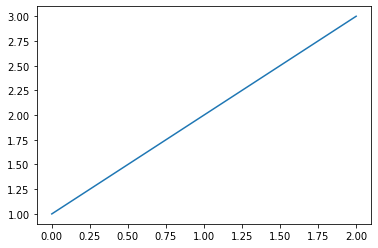

In [11]:
lines = plt.plot([1, 2, 3])
plt.setp(lines)

## 同时操作多个figure和多个axes
MATLAB和pyplot都会有一个“当前选中的figure和axes”的概念，也就是说所有的绘图函数都会作用于当前选中的axes。`gca`函数可以返回当前选中的axes（它是一个`matplotlib.axes.Axes`实例），而`gcf`可以返回当前选中的figure(一个` matplotlib.figure.Figure`实例)。一般来说，你不用考虑这个问题，因为所有选中figure和axes的操作都已经在后台做完了。在下面的脚本中，我们会生成两个子绘图区：

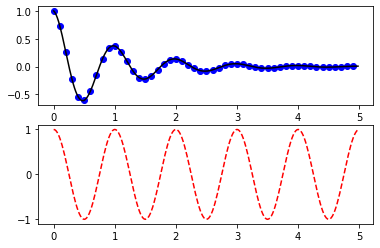

In [12]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()

plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

plt.show()

这里对`figure`的调用可写可不写，因为在我们调用绘图函数时，如果此时没有figure，那会新创建一个figure。同理，如果此时没有axes，也会创建一个新的axes（效果和额外调用一次`subplot()`是一样的）。`subplot`在调用时需要指定子图区的行`numrows`, 列`numcols`，和子图序号`plot_number`，其中`plot_number`的序号范围为1到`numrows*numcols`。如果`numrows*numcols`<10的话，`subplot`函数里的逗号是可以去掉的，也就是说`subplot(211)`和`subplot(2,1,1)`是一样的。

你也可以创建任意数量的子图和axes。如果你想手动设置某个axes的位置，而不想让它对齐网格，使用`axes([left, bottom, width, height])`，这里使用的是分数坐标（0到1）。手动设置axes的更多例子详见[Axes Demo](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axes_demo.html)，多个子图的例子详见[Multiple subplots](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplot.html)。

你可以通过多次调用`figure()`函数来创建多个figure，每次创建新figure时参数的数值值要增加一位。当然，每个figure也能包含你想要的任意多的axes和子图：

Text(0.5, 1.0, 'Easy as 1, 2, 3')

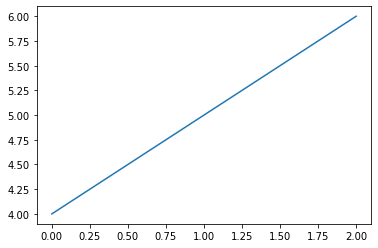

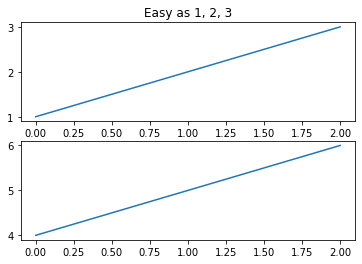

In [13]:
plt.figure(1) # 创建第一个figure
plt.subplot(211) # 在第一个figure中创建第一个子图
plt.plot([1,2,3])
plt.subplot(212) # 在第一个figure中创建第二个子图
plt.plot([4, 5, 6])

plt.figure(2)                # 第二个figure
plt.plot([4, 5, 6])          # 此时会默认创建一个子图

plt.figure(1) # 切换回第一个figure; 当前选中的子图仍为subplot(212)
plt.subplot(211) # 切换subplot(211)为当前的子图
plt.title('Easy as 1, 2, 3') # 设置subplot(211)的标题

你可以使用`clf()`清除当前的figure，使用`cla()`清除当前的axes。如果你觉得这些状态（具体来说就是当前的图像，figure和axes）都在后台自动维护是一件很烦人的事，不要沮丧：这只是一个面向对象的API的一个很小的状态装饰器，你后面还可以反过来利用它（详见[Artist tutorial](https://matplotlib.org/stable/tutorials/intermediate/artists.html)）。

如果你创建了太多的figure，还有一件事需要注意：如果你不用`close()`将一个figure关闭，这个figure占的内存不会被完全释放。删除所有与这个figure相关的引用，和（或）使用窗口管理器将展示figure的窗口关闭，都是不够的，因为除非调用`close()`,否则pyplot就会一直维护着对这个figure的内部引用。

## 文本相关的操作
你可以使用`text()`在任意位置添加文本，`xlabel()`,`ylabel()`和`title()`则可以用来在特定的位置添加文字（更多例子详见[ Text in Matplotlib Plots](https://matplotlib.org/stable/tutorials/text/text_intro.html)）

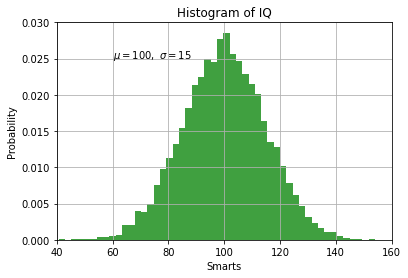

In [14]:
mu,sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# 生成上述数据的直方图
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, 0.025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid()
plt.show()

所有文本相关函数都会返回一个`matplotlib.text.Text`实例。如上面的代码中所示，你可以通过向文本函数中传入关键字参数或是使用`setp`来自定义文本的属性：

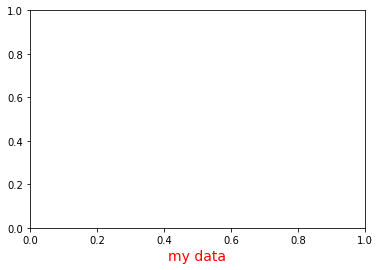

In [15]:
t = plt.xlabel('my data', fontsize=14, color='red')

关于这些属性，更详细的介绍见[Text properties and layout](https://matplotlib.org/stable/tutorials/text/text_props.html)。

### 在文本中使用数学表达式
Matplotlib的所有文本中都可以接受Tex格式的表达式。举例来说，如果你想在标题中添加$\sigma_i=15$，你可以在两个“$”符号中间输入TeX表达式：

Text(0.5, 1.0, '$\\sigma_i=15$')

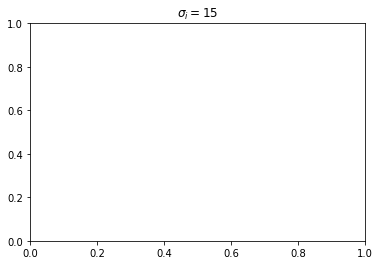

In [16]:
plt.title(r'$\sigma_i=15$')

在文本前面的`r`指定了字符串为*纯*字符串，反斜杠“\”不应被处理为python的转义符。Matplotlib有内置的Tex表达式的分析与呈现引擎，并有它自己的数学格式，详见[Writing mathematical expressions](https://matplotlib.org/stable/tutorials/text/mathtext.html)。这样一来你就也可以在没有安装TeX的情况下也使用数学表达式。如果你已经安装了LaTeX和dvipng，你也可以直接使用LaTeX来安排版式，并合并到最终呈现或保存的图像中，详见[Text rendering with LaTeX](https://matplotlib.org/stable/tutorials/text/usetex.html)。

### 使用文本标注
上面提到的`text`函数可以将文本放置在任意的地方。文本的一个常见用途是用来标注出图中的某些特征，而`annotate`函数能帮我们更简单地实现这一功能。在标注时，需要提供两个点的位置：箭头所指的位置`xy`和文本的位置`xytext`，这两个参数的类型都是`(x, y)`元组。

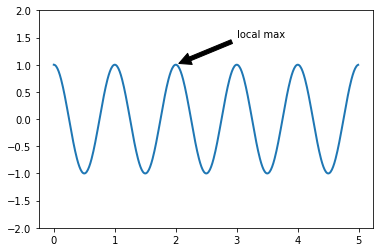

In [17]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylim(-2, 2)
plt.show()

在这个简单的例子中，*xy*和*xytext*都是用的数据的坐标。你还可以选择其他各种类型的坐标系，见[Basic annotation ](https://matplotlib.org/stable/tutorials/text/annotations.html#annotations-tutorial)和[Advanced Annotations](https://matplotlib.org/stable/tutorials/text/annotations.html#plotting-guide-annotation)。更多例子见[Annotating Plots](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html)。

## 对数的或其他非线性的坐标系
`matplotlib.pyplot`不仅支持线性的坐标系，也支持对数或logit缩放的坐标系。这种情况常见于指数级变化的数据。变更坐标系的缩放方式是很简单的：
> plt.xscale('log)

下面的代码示例展示了同一个数据在不同缩放坐标系下绘制出来的图像：

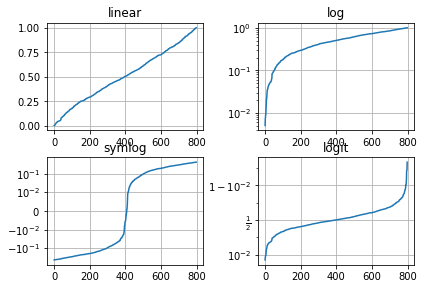

In [18]:
# 为了能重复结果，固定随机数结果
np.random.seed(19680801)

# 在(0, 1)之间生成一些随机数据
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# 使用不同的缩放类型进行绘图
plt.figure()

# 线性
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# 对数
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# 对称对数 symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# Logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# 调整一下图像大小，因为Logit的绘图区要占比其他绘图区占更多的位置，原因是它的y轴刻度标签是"1 - 10^{-3}"这种长文本
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()

你也可以添加自定义的缩放类型，详见[matplotlib.scale](https://matplotlib.org/stable/api/scale_api.html#module-matplotlib.scale)。